In [244]:
import os
import numpy as np
import pandas as pd
from osgeo import gdal, osr
import h5py
import matplotlib.pylab as plt


def qa_num_to_binary(qa_num):
## Convert number to binary
    if np.isnan(qa_num):
        return 'NaN'
    else:
        binary_string = bin(int(qa_num) & 0xFFFF)[2:].zfill(16)
        return binary_string

# Apply the function to the entire array using np.vectorize
vectorized_qa_num_to_binary = np.vectorize(qa_num_to_binary)

# Open the hdf file
root = "/home/hamid/dscovr/"
file = "data/DSCOVR_EPIC_L2_VESDR_02_20160823152458_03.h5"
h5fpath  = os.path.join(root, file)   
h5f = h5py.File(h5fpath, "r") 
date = file.split("_")[5]

# Get the exisitng tile list in the file
tile_list = [key for key in h5f.keys()]

# Open on one tile
tile = tile_list[4]
print(tile)

# extract NDVI
ndvi_field = '05_NDVI'
qa_field = '06_QA_VESDR'
Scale_factor_VESDR = 0.001


tile31


In [220]:
ndvi = np.array(h5f[tile][ndvi_field])
ndvi = ndvi.astype(float)
ndvi[(ndvi >= -9999) & (ndvi <= -9997)] = np.nan
qa = np.array(h5f[tile][qa_field])
qa = np.where(np.isfinite(ndvi),qa,np.nan)


In [224]:
qa_bin = vectorized_qa_num_to_binary(qa)

In [226]:
indices = np.where(np.isfinite(qa))
r = indices[0][0]
c = indices[1][0]

qa_bin


array([['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', '0000000000000111'],
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ...,
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN']], dtype='<U16')

In [212]:
mask = np.all(np.array([list(row)[-9:] for row in qa_bin]) == '0', axis=1)

# Mask the binary representations where bits 0 to 8 are all 0
masked_binaries = np.where(mask[:, np.newaxis], 'Masked', qa_bin)



In [232]:
bin_array = np.array([['0000000000000111', '0000000000000000', '0000000010101010'],
                      ['1111111111111111', '0000000000000000', '0000000000001000']])

# Create a boolean mask based on the condition
mask = np.all(np.array([list(row)[-9:] for row in bin_array]) == '0', axis=1)[:, np.newaxis]
# Print the mask
print(mask)

[[False]
 [False]]


In [267]:
def qa_num_to_binary1(qa_num):
## Convert number to binary
    if np.isnan(qa_num):
        return False
    else:
        binary_string = bin(int(qa_num) & 0xFFFF)[2:].zfill(16)
        if np.all(np.array(list(binary_string)[-9:])=='0'):
            return True
        return False

        # return binary_string


In [251]:
binary_string = bin(int(1536) & 0xFFFF)[2:].zfill(16)
np.all(np.array(list(binary_string)[-9:])=='0')

True

In [268]:
vectorized_qa_num_to_binary1 = np.vectorize(qa_num_to_binary1)

In [269]:
qa_bin1 = vectorized_qa_num_to_binary1(qa)

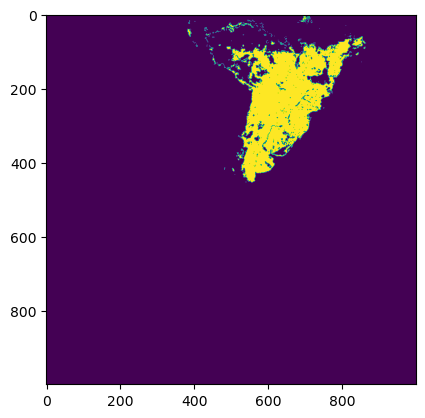

In [273]:
plt.imshow(qa_bin1)